# ImageNet

In [23]:
import torch
import torch.nn as nn
from torchvision import transforms

In [10]:
use_cuda = True
device = torch.device('cuda' if use_cuda else 'cpu')

In [14]:
from urllib.request import urlretrieve
import json

imagenet_json, _ = urlretrieve('http://www.anishathalye.com/media/2017/07/25/imagenet.json')
with open(imagenet_json) as f:
    imagenet_labels = json.load(f)

In [16]:
print(imagenet_labels[18])

magpie


### 이미지 처리 및 이미지 출력

In [27]:
preprocess = transforms.Compose([transforms.Resize(256),
                                 transforms.CenterCrop(224),
                                 transforms.ToTensor()])

In [49]:
import matplotlib.pyplot as plt
import PIL # Python Imaging Library

In [39]:
def image_loader(path):
    image = PIL.Image.open(path)
    image = preprocess(image).unsqueeze(0)
    return image.to(device, torch.float)

In [41]:
url = 'https://search.pstatic.net/sunny/?src=https%3A%2F%2Fi.pinimg.com%2F736x%2Fcc%2F7b%2F9a%2Fcc7b9a6bdc394876d437ee461e3e6ca5.jpg&type=sc960_832'
image_path, _ = urlretrieve(url)
image = image_loader(image_path)

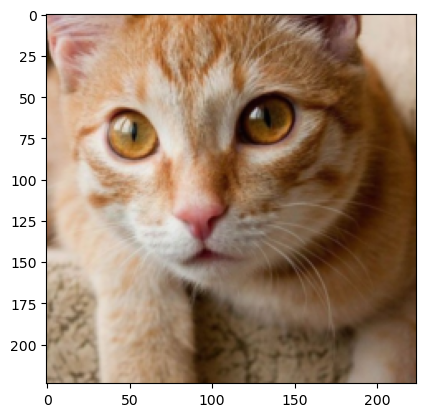

In [47]:
def imshow(tensor):
    image = tensor.cpu().clone()
    image = image.squeeze(0)
    image = transforms.ToPILImage()(image)
    plt.imshow(image)

plt.figure()
imshow(image)

### ResNet

In [54]:
class Normalize(nn.Module):
    def __init__(self, mean, std):
        super(Normalize, self).__init__()
        self.register_buffer('mean', torch.Tensor(mean))
        self.register_buffer('std', torch.Tensor(std))

    def forward(self, input):
        mean = self.mean.reshape(1, 3, 1, 1)
        std = self.std.reshape(1, 3, 1, 1)
        return (input - mean) / std

In [56]:
model = nn.Sequential(
    Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    torch.hub.load('pytorch/vision:v0.6.0', 'resnet18', pretrained=True)).to(device).eval()

Downloading: "https://github.com/pytorch/vision/zipball/v0.6.0" to C:\Users\82107/.cache\torch\hub\v0.6.0.zip
C:\Users\82107\anaconda3\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\82107\anaconda3\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to C:\Users\82107/.cache\torch\hub\checkpoints\resnet18-f37072fd.pth
100%|█████████████████████████████████████████████████████████████████████████████| 44.7M/44.7M [00:00<00:00, 52.7MB/s]

In [58]:
outputs = model(image)

percentages = torch.nn.functional.softmax(outputs, dim=1)[0] * 100

print("< 가장 높은 확률을 가지는 클래스들 >")
for i in outputs[0].topk(5)[1]:
    print(f"인덱스: {i.item()} / 클래스명: {imagenet_labels[i]} / 확률: {round(percentages[i].item(), 4)}%")

< 가장 높은 확률을 가지는 클래스들 >
인덱스: 285 / 클래스명: Egyptian cat / 확률: 54.3391%
인덱스: 281 / 클래스명: tabby, tabby cat / 확률: 20.1785%
인덱스: 282 / 클래스명: tiger cat / 확률: 19.2777%
인덱스: 287 / 클래스명: lynx, catamount / 확률: 5.068%
인덱스: 478 / 클래스명: carton / 확률: 0.0922%
